### What is Principal Component Analysis?
* The Principal Component Analysis is a popular unsupervised learning technique for reducing the dimensionality of data.
* It increases interpretability yet, at the same time, it minimizes information loss.
* It helps to find the most significant features in a dataset and makes the data easy for plotting in 2D and 3D.
* PCA helps in finding a sequence of linear combinations of variables.
* PCA is used to visualize multidimensional data.
* PCA can help resize an image.
* It can be used in finance to analyze stock data and forecast returns.
* PCA helps to find patterns in the high-dimensional datasets.

### Steps in PCA

1. Normalize the data
    * Standardize the data before performing PCA. This will ensure that each feature has a mean = 0 and variance = 1.
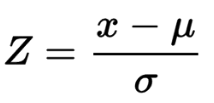

2. Build the covariance matrix
    * Construct a square matrix to express the correlation between two or more features in a multidimensional dataset.
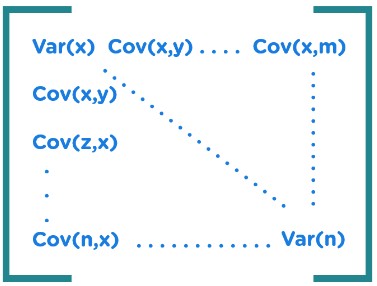

3. Find the Eigenvectors and Eigenvalues
    * Calculate the eigenvectors/unit vectors and eigenvalues. Eigenvalues are scalars by which we multiply the eigenvector of the covariance matrix.
4. Sort the eigenvectors in highest to lowest order and select the number of principal components.

### PCA in Python

### Load & Read the Data

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('D:\PGP IN DATA SCIENCE with Careerera\Data Sets\ML Datasets\\WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [7]:
df.drop('Id', axis=1, inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.shape

(1143, 12)

In [9]:
df.size

13716

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


### Missing values

In [13]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Summery Statistics

In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Unque values in Quality

In [15]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [36]:
df.quality.replace({3:1,4:1,5:1,6:2,7:2,8:2},inplace=True)

### Correlation Matrics

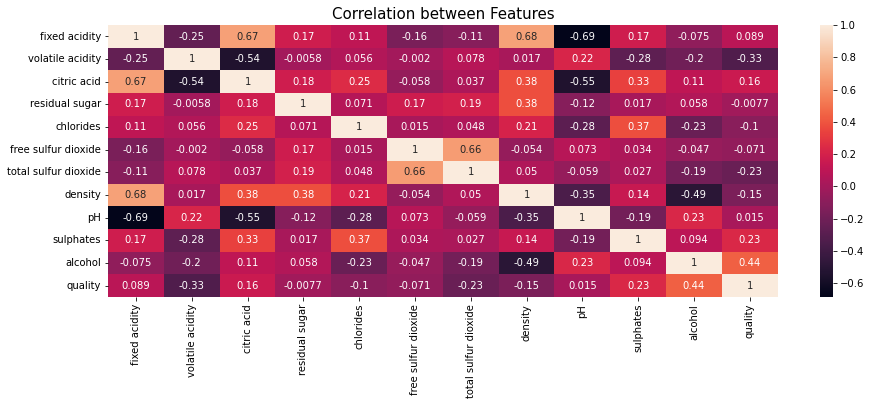

In [37]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation between Features", fontsize=15);

### Divide data into Dependent & independent features

In [38]:
X=df.drop('quality', axis=1)
y=df['quality']

### Normalize the data

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X, columns=df.columns[:-1])
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601
2,-0.292593,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601
3,1.653789,-1.399789,1.483400,-0.466421,-0.252560,0.135127,0.429852,0.659792,-0.964363,-0.456235,-0.593601
4,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382


### Plot variance ratio

In [40]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
X_pca=pca.fit(X)

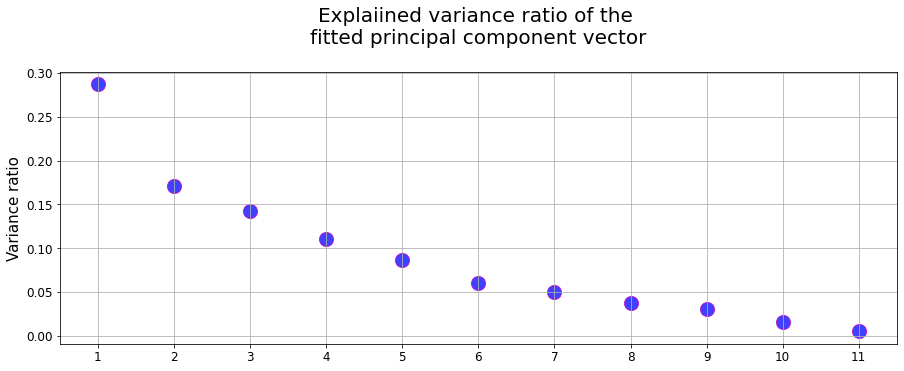

In [41]:
plt.figure(figsize=(15,5))
plt.scatter(x=[i+1 for i in range(len(X_pca.explained_variance_ratio_))],
              y=X_pca.explained_variance_ratio_,
              s=200, alpha=0.75, c='blue', edgecolor='m')
plt.grid(True)
plt.title("Explaiined variance ratio of the \nfitted principal component vector\n", fontsize=20)
plt.xticks([i+1 for i in range(len(X_pca.explained_variance_ratio_))], fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Variance ratio", fontsize=15);

From the above graph, we’ll consider the first two principal components as they together explain nearly 56% of the variance.

### Transform PCA data

In [42]:
X_trans=pca.transform(X)
X_trans=pd.DataFrame(data=X_trans)
X_trans.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.561545,0.444892,-1.767209,0.132635,0.130138,-0.906815,0.122336,-0.330086,0.011548,0.249611,0.046465
1,-0.760892,1.915058,-0.864158,0.536890,0.090935,0.860406,0.998623,0.746939,-0.547644,-0.005196,-0.134810
2,-0.708085,0.914423,-1.142363,0.435075,0.024940,0.356702,0.536162,0.575652,-0.084118,0.203715,-0.122553
3,2.308166,-0.224448,0.256895,-0.830630,-1.639209,-0.154720,-0.300410,-0.494589,0.110087,0.121798,0.313678
4,-1.561545,0.444892,-1.767209,0.132635,0.130138,-0.906815,0.122336,-0.330086,0.011548,0.249611,0.046465


### Visualize the 2 Principal components

Text(0.5, 1.0, 'Class Seperation using Principal components\n')

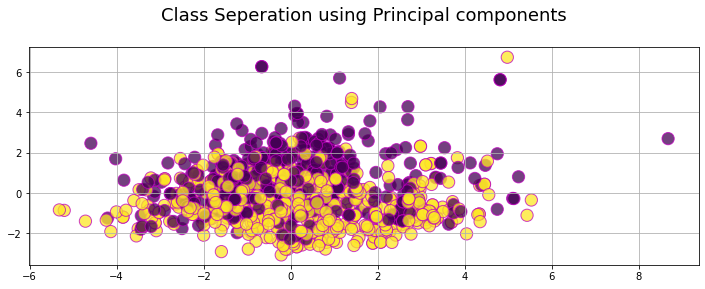

In [43]:
plt.figure(figsize=(12,4))
plt.scatter(X_trans[0],X_trans[1],c=df['quality'], edgecolor='m',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class Seperation using Principal components\n", fontsize=18)

**By applying PCA to the wine dataset, you can transform the data so that most we can capture variations in the variables with a fewer number of principal components. It is easier to distinguish the wine classes by inspecting these principal components rather than looking at the raw data.**